In [10]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns 
import matplotlib.pyplot as plt
import math

data_dir = "../data"
print(os.listdir(data_dir))

['test_V2.csv.zip', 'train_V2.csv.zip']


# Data Analysis

In [12]:
df_train = pd.read_csv("../data/train_V2.csv.zip")

In [3]:
# df_test = pd.read_csv("../data/test_V2.csv.zip")

In [13]:
df_train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [14]:
df_train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000160B5373550>,
      dtype=object)

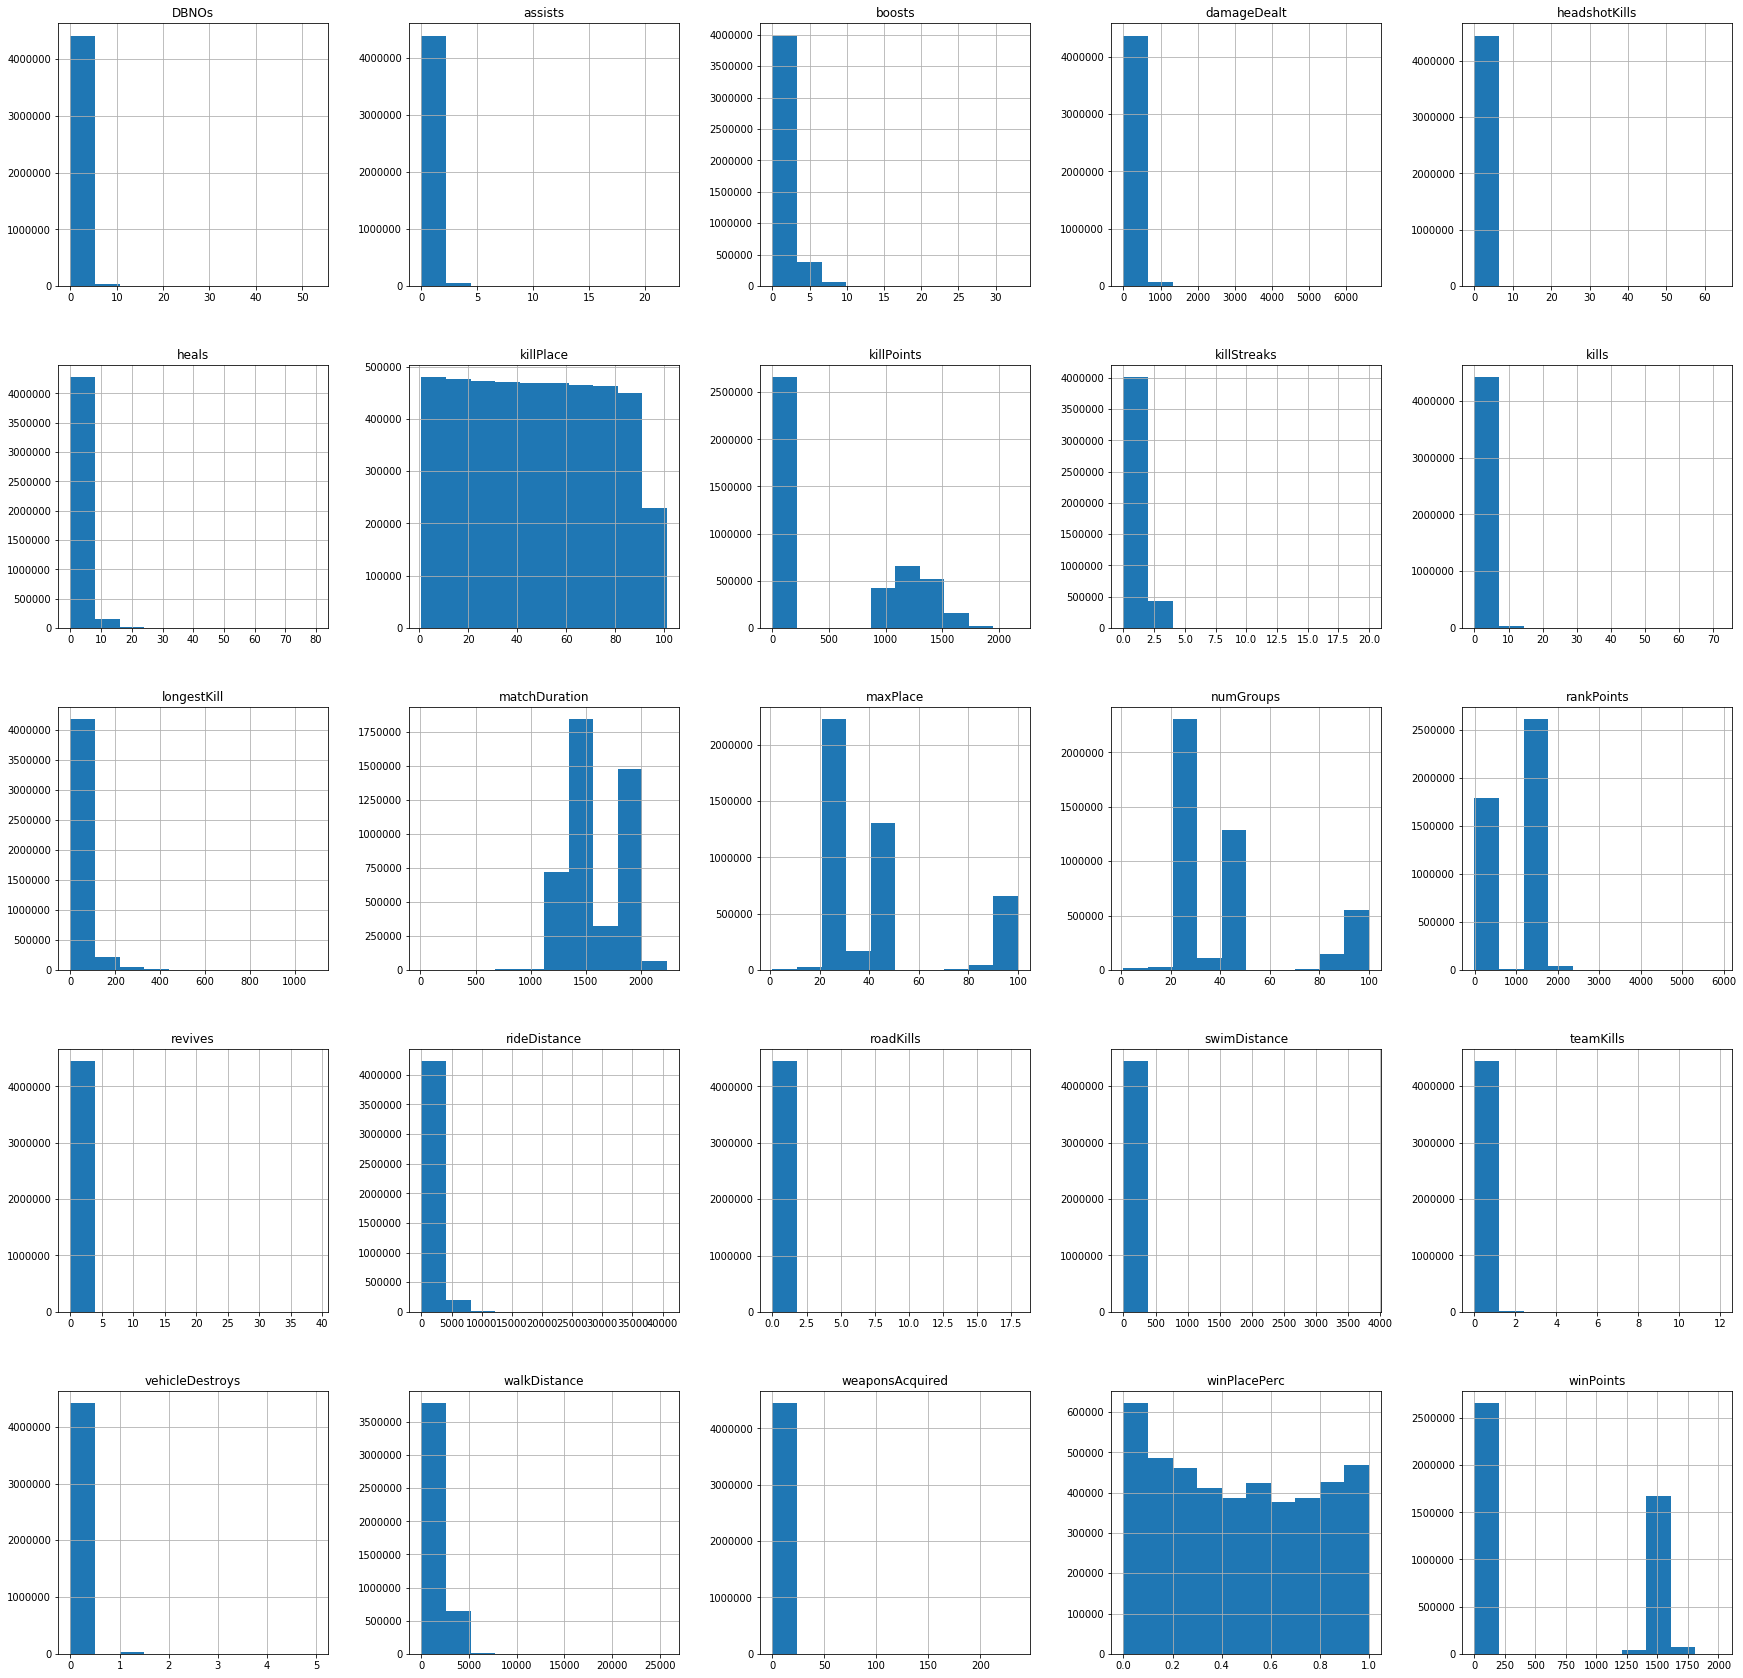

In [15]:
df_train.hist(bins=10, figsize=(30, 30))

In [16]:
# agg_cols = ['groupId', 'killPlace', 'killStreaks', 'walkDistance', 'winPlacePerc']
# agg_func = {'groupId':'count', 
#             'killPlace':['min','max'], 
#             'killStreaks':'sum', 
#             'walkDistance':'sum' , 
#             'winPlacePerc': 'max'}

# match_0 = df_train.query('matchId == 2').reset_index()
# # print(match_0.keys())
# # print(match_0['numGroups'][0])
# #print(match_0.query('groupId == 878228'))# 21')
# grp = match_0[agg_cols]\
# .groupby(['groupId'])\
# .agg(agg_func)\
# .sort_values(by=[('winPlacePerc', 'max')], ascending=False)

## 1. Group by data by group & match 

In [17]:
agg_funcs = {'assists':'sum',
             'boosts':'sum',
             'damageDealt':'sum',
             'DBNOs':'sum',
             'headshotKills':'sum',
             'heals':'sum',
             'killPlace':'min',
             'killPoints':'sum',
             'kills':'sum',
             'killStreaks':'sum',
             'longestKill':'max',
             'matchDuration':'mean',
             'matchType':'max', # new value
             'maxPlace':'max', # may not equal to group num
             'numGroups':'max',
             'rankPoints':'sum', # depatured in next version
             'revives':'sum',
             'rideDistance':'sum',
             'roadKills':'sum',
             'swimDistance':'sum',
             'teamKills':'sum',
             'vehicleDestroys':'sum',
             'walkDistance':'sum',
             'weaponsAcquired':'sum',
             'winPoints':'sum', # rankPoints where only win counts
             'winPlacePerc':'max'} # 1 is best, 0 is last

In [18]:
group_match_data = df_train.groupby(['groupId', 'matchId'])
group_match_data = group_match_data.agg(agg_funcs)
group_match_data = group_match_data.sort_values(by=['matchId','winPlacePerc'],
                                                ascending=False)
group_match_data = group_match_data.reset_index()
group_match_data = group_match_data.sort_values(by=['matchId', 'winPlacePerc'],
                                                ascending=False)
group_match_data = group_match_data.reindex()

**rename groupId & matchId**

In [19]:
# np.array(range(len(group_match_data['groupId'])))
group_match_data['groupId'] = np.arange(len(group_match_data['groupId']))

In [20]:
reindex_match_dict = dict()
counter = 0
for matchId in group_match_data.matchId.values:
    if matchId not in reindex_match_dict:
        reindex_match_dict[matchId] = counter
        counter += 1

In [21]:
group_match_data['matchId'] = \
group_match_data['matchId'].apply(lambda x: reindex_match_dict[x])

In [22]:
del reindex_match_dict

**save group match data. because groupby is very slow.**

In [23]:
group_match_data.to_csv(os.path.join(data_dir,'group_match_data_train.csv'), 
                        index=False, sep=',', quotechar='"')

## 1.1 load team & match data directly from saved file.

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns 
import matplotlib.pyplot as plt
import math

data_dir = "../data"
print(os.listdir(data_dir))

['group_match_data_train.zip', 'test_V2.zip', 'train_V2.zip']


In [4]:
group_match_data = \
pd.read_csv(os.path.join(data_dir,'group_match_data_train.zip'))

## 2. analysis team & match data

In [5]:
pd.value_counts(group_match_data['matchType'])
# matchtp = group_match_data['matchType']

solo-fpp            523458
squad-fpp           506161
duo-fpp             486491
squad               177080
solo                168577
duo                 152324
normal-squad-fpp      3950
crashfpp              3130
normal-duo-fpp        2815
normal-solo-fpp       1227
flaretpp               695
normal-solo            232
flarefpp               200
crashtpp               180
normal-squad           124
normal-duo             101
Name: matchType, dtype: int64

In [6]:
import seaborn as sns

Text(0,0.5,'Data Size')

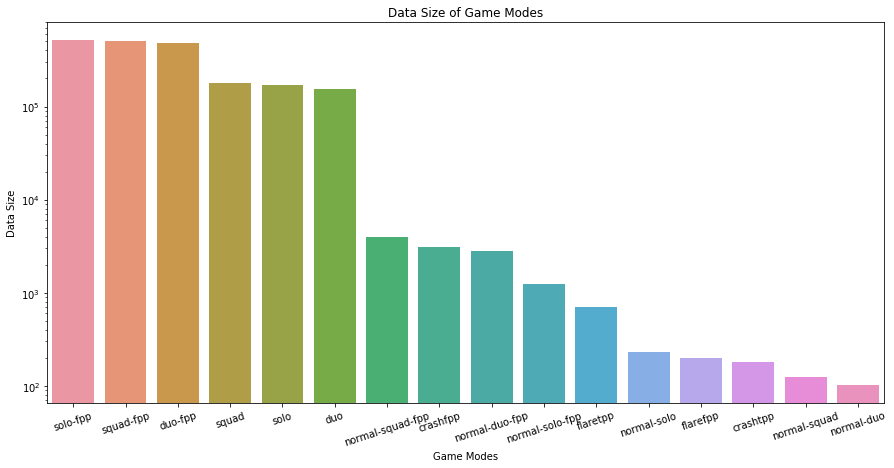

In [7]:
fig = plt.figure(figsize=(15,7))
data_plt = pd.value_counts(group_match_data['matchType'])
ind = data_plt.keys().tolist()
l_0 = data_plt
p1 = sns.barplot(ind, l_0, log=True)
plt.xticks(rotation=18)
plt.title('Data Size of Game Modes')
plt.xlabel('Game Modes')
plt.ylabel('Data Size')
# .plot(kind='bar', log=True, figsize=(15,7), xrotation=15)

In [8]:
match_group_player_count = df_train[['groupId', 'matchId', 'winPlacePerc']]\
.groupby(['groupId', 'matchId'])\
.count()\
.rename(index=str, columns={'winPlacePerc': 'player_count'})

NameError: name 'df_train' is not defined

In [97]:
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler

In [103]:
transformer = MinMaxScaler().fit(grp['walkDistance'])

In [104]:
data_norm = transformer.transform(grp['walkDistance'])

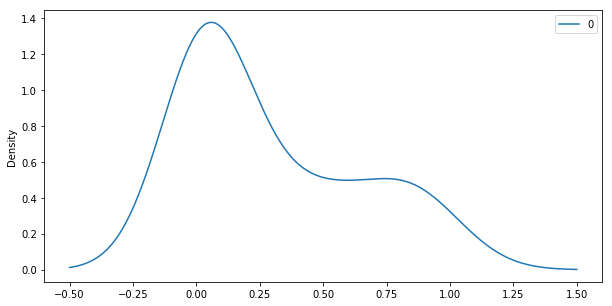

In [105]:
# grp[['walkDistance']].plot(kind='density', figsize=(20,10))
# pd.DataFrame(data_norm).plot(kind='density', figsize=(20,10))
pd.DataFrame(data_norm).plot(kind='density', figsize=(10,5))

In [5]:
df_train= df_train.set_index(['Id'])
df_test= df_test.set_index(['Id'])
ColumnList = ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals','killPoints', 
              'kills', 'killStreaks', 'longestKill','revives', 'rideDistance', 'roadKills',
              'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance','weaponsAcquired', 'winPoints','winPlacePerc']
df_Train = df_train[ColumnList]
ColumnList.remove('winPlacePerc')
df_Test = df_test[ColumnList]

In [128]:
corr = group_match_data.corr()

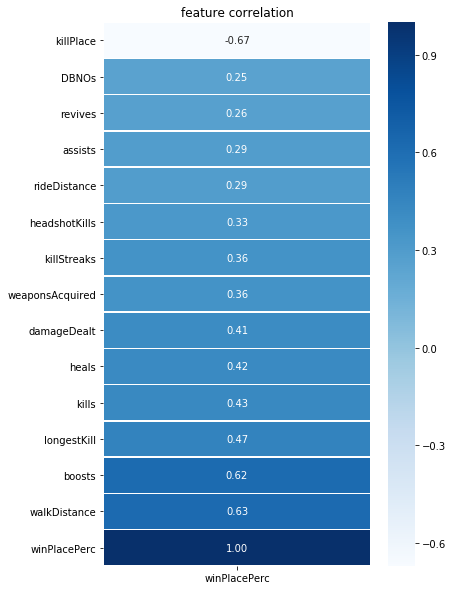

In [129]:
# corr= df_train.corr()
Y_Column = 'winPlacePerc'
corr_Target = corr[[Y_Column]]
x = 0.2
corr_T= corr_Target[abs(corr_Target['winPlacePerc'])>x]
corr_T = corr_T.sort_values(by='winPlacePerc')
fig = plt.figure(figsize=(6, 10))
# f,ax = plt.subplots()
sns.heatmap(corr_T, annot=True, linewidths=.5, fmt= '.2f', cmap=plt.cm.Blues)
plt.title("feature correlation",fontsize=12)
fig.show()
fig.savefig("corr_2_winPlace.png")